# Multiple Linear Regression

# Bike-Sharing Case Study

## Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


***The company wants to know:***

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

***Objective:***

- To develop a linear model with the available independent variables that quantitatively relates factors affecting the demand for these shared bikes in the American market.

- The model will drive the business strategy to meet the demand levels and meet the customer's expectations.

- The model will used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.


## Step 1: Importing Libraries

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# NumPy and Pandas libraries to read the dataset
import numpy as np
import pandas as pd

# Matplotlib and Seaborn libraries to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns

#Importing sklearn libraries for data set split and rescaling data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#Importing sklearn libraries for linear model building
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Step 2: Reading and Understanding the Data

In [3]:
Bike_Sharing = pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset
Bike_Sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Inspect the various aspects of the housing dataframe

In [5]:
Bike_Sharing.shape

(730, 16)

In [6]:
Bike_Sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
Bike_Sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 3: Cleaning Data

### 3.1 Drop columns that are not useful for analysis

In [8]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

In [9]:
Bike_Sharing.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

### 3.2 Convert season, mnth, weekday and weathersit to categorical types

In [10]:
Bike_Sharing['season'] = Bike_Sharing['season'].map( {1:'spring', 2:'summer', 3:'fall', 4:'winter'} ).astype(str)

In [11]:
Bike_Sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
Bike_Sharing.mnth = Bike_Sharing.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [13]:
Bike_Sharing.weekday = Bike_Sharing.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [14]:
Bike_Sharing.weathersit = Bike_Sharing.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [15]:
Bike_Sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### 3.3 Handle Missing values

In [16]:
#Print null counts by column
Bike_Sharing.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

#### _`Inference`_: There are no null values.

### 3.4 Handling Outliers

In [17]:
Bike_Sharing.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

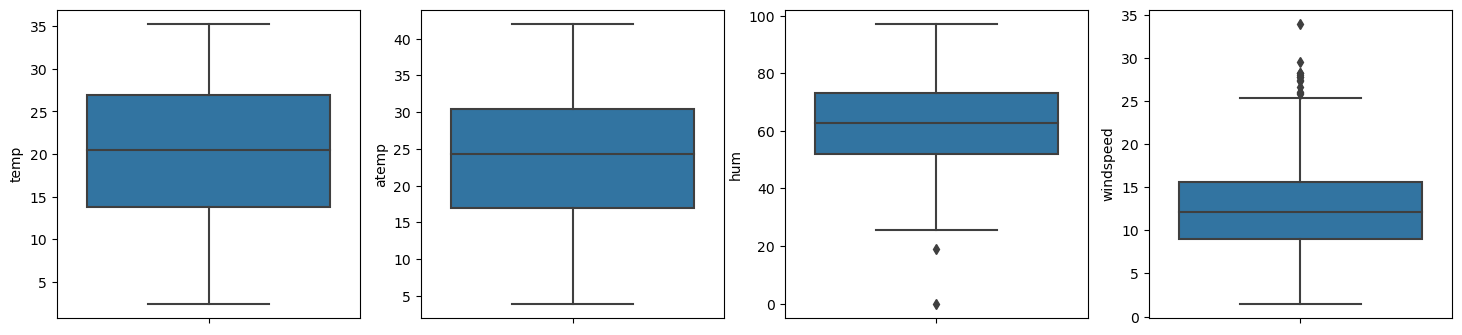

In [18]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=Bike_Sharing)
    i+=1

#### _`Inference`_: 
From these plots, we can see there are no outliers to be handled.

## Step 4: Visualising the Data

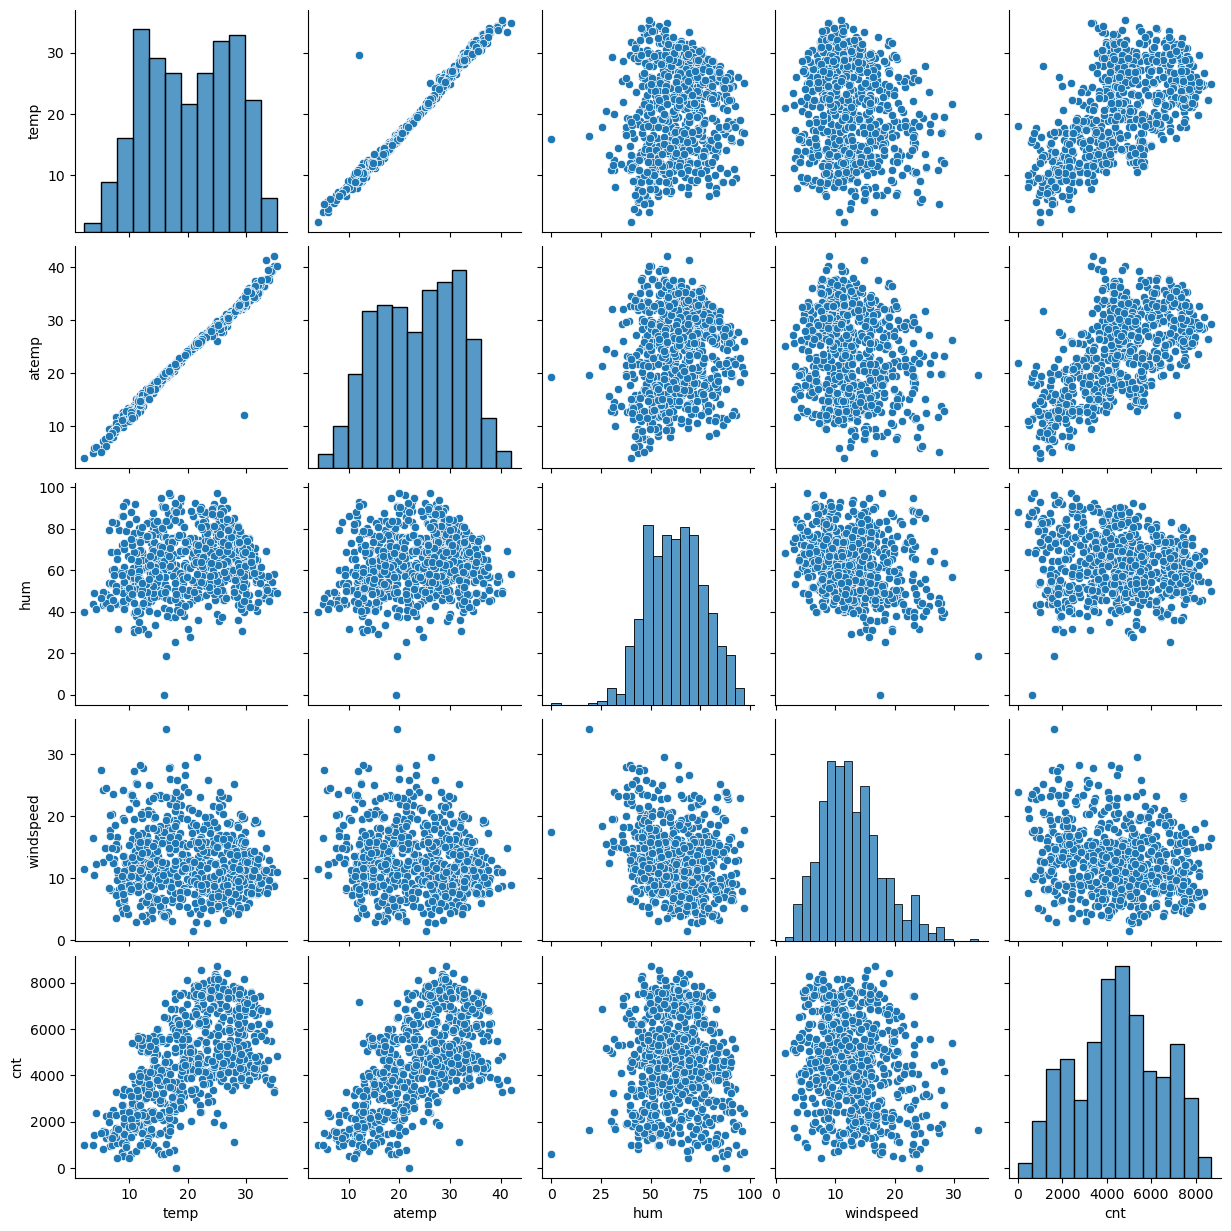

In [19]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=Bike_Sharing,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()


#### _`Inference`_: 
- Looks like the `temp` and `atemp` has the highest corelation with the target variable cnt
- `temp` and `atemp` are highly co-related with each other

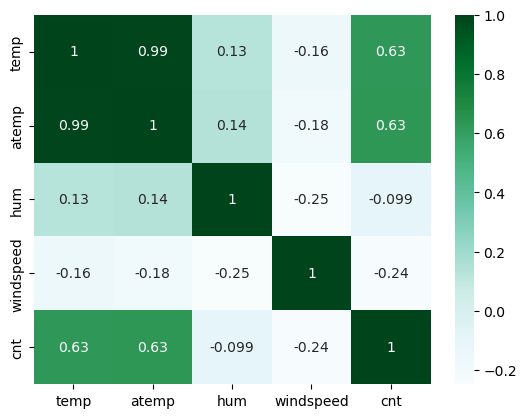

In [20]:
sns.heatmap(Bike_Sharing[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

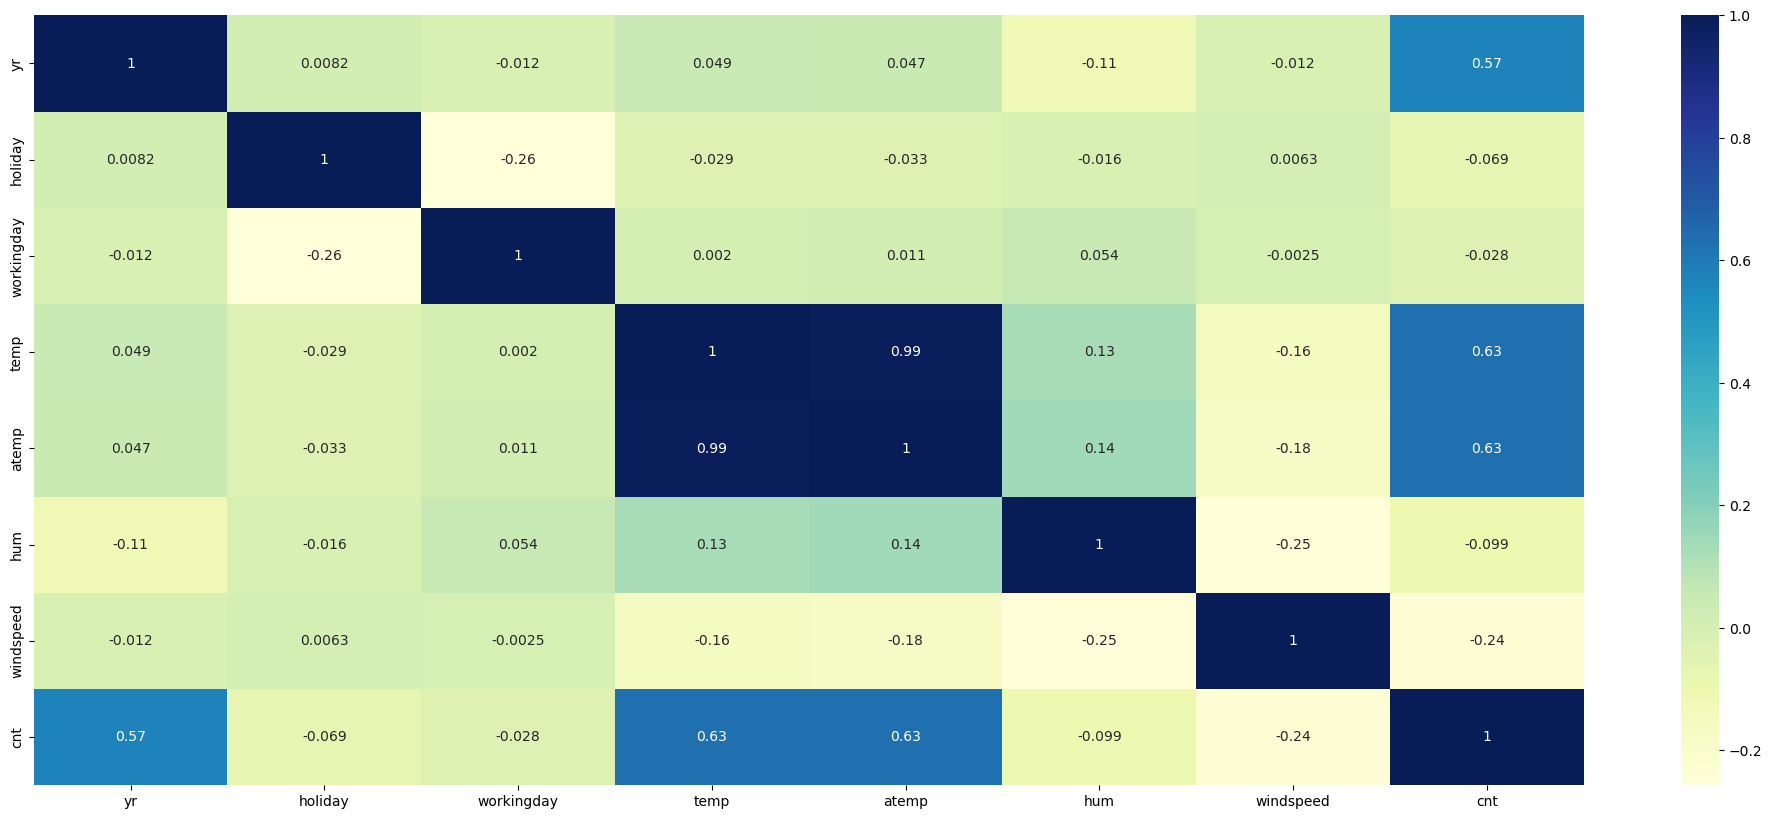

In [21]:
#Calculate Correlation
corr = Bike_Sharing.corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

#### _`Inference`_:
- Here we see that `temp` and `atemp` has correlation more than .99 means almost 1 (highly correlated). `atemp` seems to be derived from `temp` so `atemp` column can be dropped

- Target variable `cnt` has a linear relationship with some of the independent variables. Good sign for building a linear regression Model.

<Axes: xlabel='mnth', ylabel='cnt'>

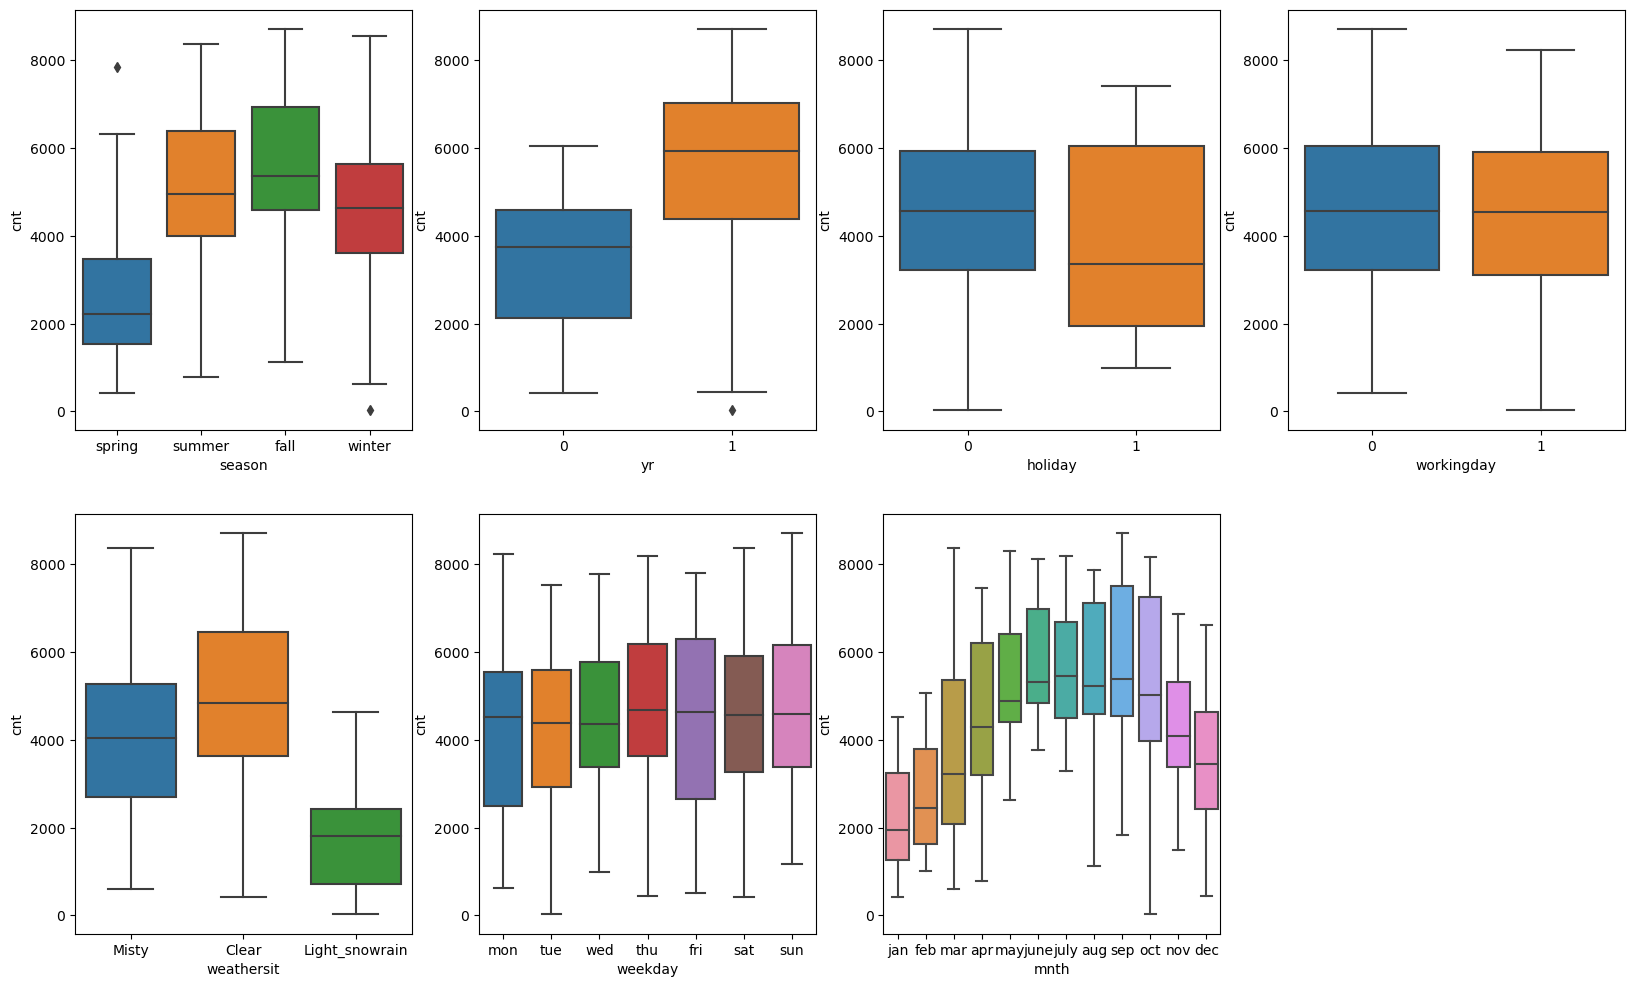

In [22]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bike_Sharing)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = Bike_Sharing)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bike_Sharing)
plt.subplot(2,4,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bike_Sharing)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bike_Sharing)
plt.subplot(2,4,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bike_Sharing)
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = Bike_Sharing)





#### _`Inference`_:
-  Fall season has highest demand for rental bikes.
- Demand for next year has grown.
- Demand is continuously growing till June, September month has highest demand. However after September, demand is decreasing.
- During holidays, demand has decreased.
- The clear weathersit has highest demand.
- During September, bike sharing is more. During the end and beginning of year, it is less.

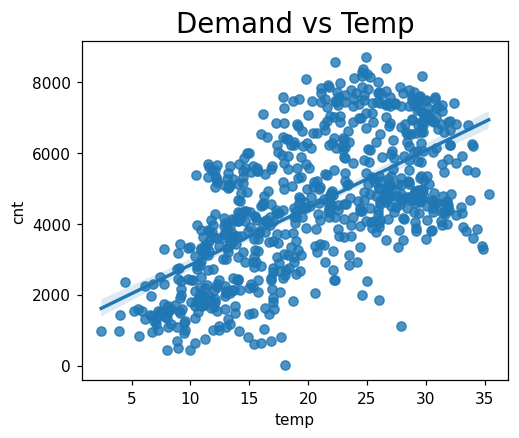

In [23]:
plt.figure(figsize=(5,4),dpi=110)
plt.title("Demand vs Temp",fontsize=18)
sns.regplot(data=Bike_Sharing,y="cnt",x="temp")
plt.show()

#### _`Inference`_:
- Demand for bikes is positively correlated to `temp`.
- We can see that `cnt` is linearly increasing with temp indicating linear relation.

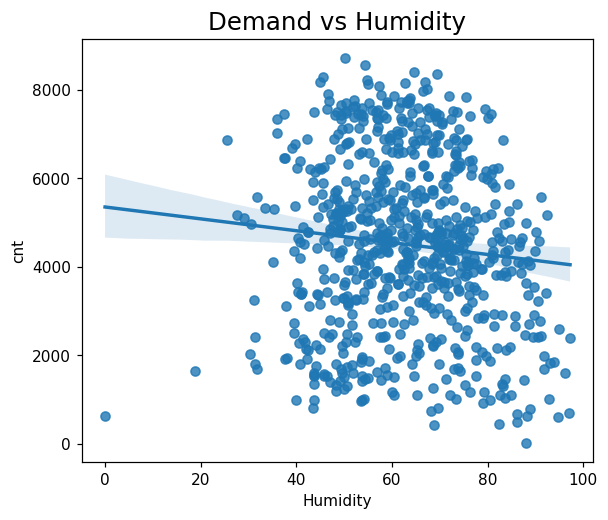

In [24]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Demand vs Humidity",fontsize=16)
sns.regplot(data=Bike_Sharing,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

#### _`Inference`_:
- We can see `cnt` decreasing with increase in humidity.

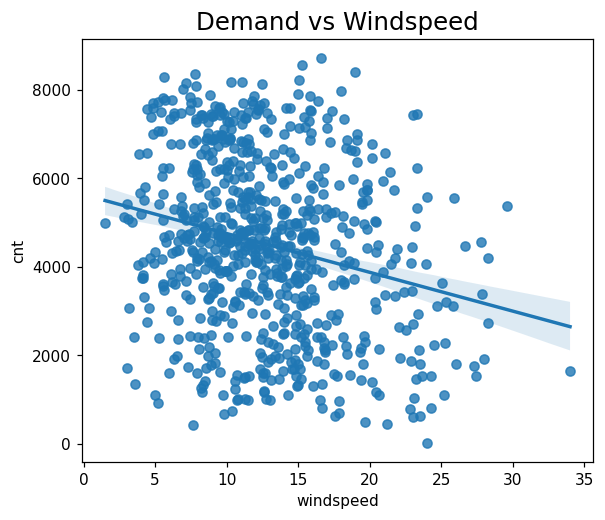

In [25]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Demand vs Windspeed",fontsize=16)
sns.regplot(data=Bike_Sharing,y="cnt",x="windspeed")
plt.show()

#### _`Inference`_:
- We can see `cnt` decreasing with increase in windspeed.

## Step 5: Data Preparation

In [26]:
# Dummy Variable
months=pd.get_dummies(Bike_Sharing.mnth,drop_first=True)
weekdays=pd.get_dummies(Bike_Sharing.weekday,drop_first=True)
weather_sit=pd.get_dummies(Bike_Sharing.weathersit,drop_first=True)
seasons=pd.get_dummies(Bike_Sharing.season,drop_first=True)

In [27]:
### Merging the dataframe

Bike_Sharing=pd.concat([months,weekdays,weather_sit,seasons,Bike_Sharing],axis=1)
Bike_Sharing.head()


,aug,dec,feb,jan,july,june,mar,may,nov,oct,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [28]:
## Dropping the unwanted columns

Bike_Sharing.drop(['mnth', 'weekday', 'weathersit', 'season'], axis = 1, inplace = True)

In [29]:
Bike_Sharing.head()

,aug,dec,feb,jan,july,june,mar,may,nov,oct,...,summer,winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [30]:
Bike_Sharing.shape

(730, 30)

In [31]:
Bike_Sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   aug             730 non-null    uint8  
 1   dec             730 non-null    uint8  
 2   feb             730 non-null    uint8  
 3   jan             730 non-null    uint8  
 4   july            730 non-null    uint8  
 5   june            730 non-null    uint8  
 6   mar             730 non-null    uint8  
 7   may             730 non-null    uint8  
 8   nov             730 non-null    uint8  
 9   oct             730 non-null    uint8  
 10  sep             730 non-null    uint8  
 11  mon             730 non-null    uint8  
 12  sat             730 non-null    uint8  
 13  sun             730 non-null    uint8  
 14  thu             730 non-null    uint8  
 15  tue             730 non-null    uint8  
 16  wed             730 non-null    uint8  
 17  Light_snowrain  730 non-null    uin


## Step 6: Splitting the Data into Training and Testing Sets

In [32]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
Bike_Sharing_train, Bike_Sharing_test = train_test_split(Bike_Sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [33]:
Bike_Sharing_train.shape

(510, 30)

In [34]:
Bike_Sharing_test.shape

(219, 30)

### Rescaling the Bike_Sharing_train dataframe


 We will be using MinMaxScaler for scaling the dataframe

In [35]:
scaler = MinMaxScaler()

In [36]:
Bike_Sharing_train.head()

,aug,dec,feb,jan,july,june,mar,may,nov,oct,...,summer,winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,1,19.201653,23.0423,55.8333,12.208807,7534
576,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,29.246653,33.1448,70.4167,11.083475,7216
426,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,16.980847,20.6746,62.1250,10.792293,4066
728,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,10.489153,11.5850,48.3333,23.500518,1796
482,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,15.443347,18.8752,48.9583,8.708325,4220


In [37]:
# Appliyng scaler on numerical vars
num_vars = ['temp','atemp','hum','windspeed','cnt']
Bike_Sharing_train[num_vars] = scaler.fit_transform(Bike_Sharing_train[num_vars])

In [38]:
# verifying the head after appying scaling.

Bike_Sharing_train.head()


,aug,dec,feb,jan,july,june,mar,may,nov,oct,...,summer,winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [39]:
Bike_Sharing_train.describe()

,aug,dec,feb,jan,july,june,mar,may,nov,oct,...,summer,winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,...,0.245098,0.24902,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,...,0.430568,0.43287,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 7: Building a linear model using RFE and Automated approach

In [40]:
# Dividing into X and Y sets for the model building
y_train = Bike_Sharing_train.pop('cnt')
X_train = Bike_Sharing_train

### 7.1 Use RFE to eliminate some columns

In [41]:
# Build a Lienar Regression model using SKLearn for RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

#Cut down number of features to 15 using automated approach
rfe = RFE(lm,n_features_to_select=15)              
rfe = rfe.fit(X_train, y_train)

In [42]:
rfe_table=pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)),columns=["Feature","support","Rank"])
rfe_table.sort_values(by="Rank",ascending=True)

,Feature,support,Rank
28,windspeed,True,1
20,summer,True,1
19,spring,True,1
18,Misty,True,1
17,Light_snowrain,True,1
23,holiday,True,1
27,hum,True,1
21,winter,True,1
10,sep,True,1
22,yr,True,1


### 7.2 Manual elimination

#### Creating Function to build a linear model using statsmodel api

In [43]:
# Takes the columns to be selected for model as a parameter and print summary of fitted model
def lr_model (cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lr = sm.OLS(y_train, X_train_sm.astype(float)).fit()
    print(lr.summary())
    return lr

#### Creating Function to calculate VIFs and print them

In [44]:
# Takes the columns for which VIF to be calcualted as a parameter and print the calculated VIF
def calculate_vif(cols):
    dt = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = dt.columns
    vif['VIF'] = [variance_inflation_factor(dt.values.astype(np.float64), i) for i in range(dt.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

#### We will start with the RFE selected columns for manual elimination

In [45]:
#Print Columns selected by RFE
X_train.columns[rfe.support_]

Index(['dec', 'jan', 'july', 'nov', 'sep', 'Light_snowrain', 'Misty', 'spring',
       'summer', 'winter', 'yr', 'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [46]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon', 'sat', 'sun', 'thu',
       'tue', 'wed', 'workingday', 'atemp'],
      dtype='object')

In [47]:
# Taking 15 columns supported by RFE
X_train_rfe = X_train[['dec', 'jan', 'july', 'nov', 'sep', 'Light_snowrain', 'Misty', 'spring',
                       'summer', 'winter', 'yr', 'holiday', 'temp', 'hum', 'windspeed']]

In [48]:
X_train_rfe.shape

(510, 15)

## Step 8: Building model

#### By eliminating features selected from RFE

### Model 1 - Start with all variables selected by RFE

In [49]:
#Selected columns for Model 1 - all 15 columns selected by RFE
col1 = ['dec', 'jan', 'july', 'nov', 'sep', 'Light_snowrain', 'Misty', 'spring',
        'summer', 'winter', 'yr', 'holiday', 'temp', 'hum', 'windspeed']
lr_model(col1)
calculate_vif(col1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          3.34e-189
Time:                        17:34:56   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3202      0.036      8.

### Model 2

In [50]:
# Dropping the column 'hum' as it has high vif
col2 = ['dec', 'jan', 'july', 'nov', 'sep', 'Light_snowrain', 'Misty', 'spring',
        'summer', 'winter', 'yr', 'holiday', 'temp', 'windspeed']
lr_model(col2)
calculate_vif(col2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          1.57e-186
Time:                        17:34:56   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2466      0.032      7.

### Model 3

In [51]:
# Dropping the column 'summer' as it has high p-value
col3 = ['dec', 'jan', 'july', 'nov', 'sep', 'Light_snowrain', 'Misty', 'spring',
        'winter', 'yr', 'holiday', 'temp', 'windspeed']
lr_model(col3)
calculate_vif(col3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          1.08e-186
Time:                        17:34:56   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2893      0.025     11.

### Model 4

In [52]:
# Dropping the column 'nov' as it has high p-value
col4 = ['dec', 'jan', 'july', 'sep', 'Light_snowrain', 'Misty', 'spring',
        'winter', 'yr', 'holiday', 'temp', 'windspeed']
lr_model(col4)
calculate_vif(col4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          2.02e-186
Time:                        17:34:56   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2769      0.025     11.

### Model 5

In [53]:
# Dropping the column 'dec' as it has high p-value
col5 = ['jan', 'july', 'sep', 'Light_snowrain', 'Misty', 'spring',
        'winter', 'yr', 'holiday', 'temp', 'windspeed']
lr_model(col5)
calculate_vif(col5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          1.13e-186
Time:                        17:34:56   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2657      0.025     10.

### Model 6

In [54]:
# Dropping the column 'jan' as it has high p-value
col6 = ['july', 'sep', 'Light_snowrain', 'Misty', 'spring',
        'winter', 'yr', 'holiday', 'temp', 'windspeed']
lr_model(col6)
calculate_vif(col6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          1.16e-186
Time:                        17:34:56   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.024     10.

### Model 7

In [55]:
# Dropping the column 'windspeed' as it has high vif
col7 = ['july', 'sep', 'Light_snowrain', 'Misty', 'spring',
        'winter', 'yr', 'holiday', 'temp']
lr_model(col7)
calculate_vif(col7)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.5
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          2.16e-181
Time:                        17:34:56   Log-Likelihood:                 479.38
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     500   BIC:                            -896.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1938      0.022      8.

#### `Inference`
Here VIF seems to be almost accepted for all variable is less than 5. p-value for all the features is  almost 0.0 and R2 is `0.823`
Let us select Model 7 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. 
Difference between R-squared and Adjusted R-squared values for this model is very less, which also means that there are no additional parameters that can be removed from this model.

### Final Model

In [56]:
cols = ['july', 'sep', 'Light_snowrain', 'Misty', 'spring',
        'winter', 'yr', 'holiday', 'temp']

X_train_final = sm.add_constant(X_train[cols])
lr_final= sm.OLS(y_train, X_train_final.astype(float)).fit()

## Step 9: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [57]:
y_train_pred = lr_final.predict(X_train_final)

Text(0.5, 0, 'Errors')

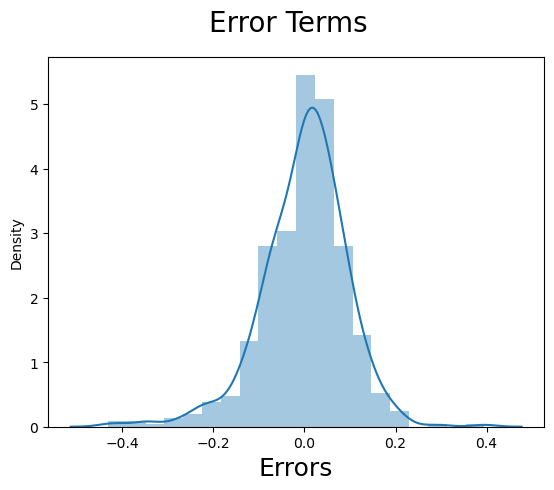

In [58]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                
plt.xlabel('Errors', fontsize = 18)


- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

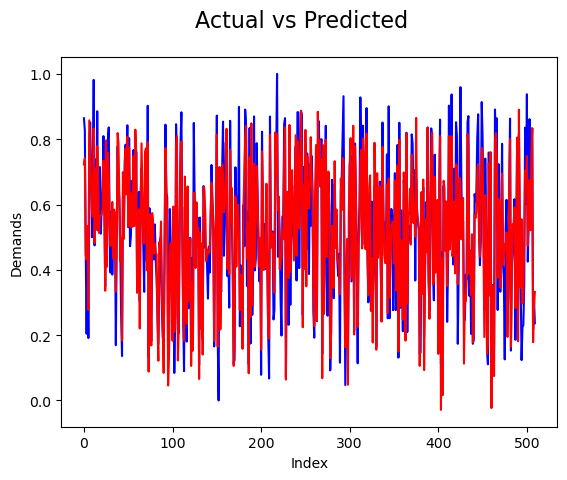

In [59]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train_final),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 16)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

- Actual and Predicted result following almost the same pattern

In [60]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8225173906649428

#### `Inference`
R-square for the predicted model is 0.822 which is almost same as we obtained for our final model as 0.823

## Step 10: Making Predictions
Applying the scaling on the test sets

In [61]:
# Appliyng scaler on numerical vars
num_vars = ['temp','atemp','hum','windspeed','cnt']
Bike_Sharing_test[num_vars] = scaler.fit_transform(Bike_Sharing_test[num_vars])

In [62]:
Bike_Sharing_test.head()

,aug,dec,feb,jan,july,june,mar,may,nov,oct,...,summer,winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300
535,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421
299,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0.496221,0.492359,0.777843,0.443398,0.278853
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512
152,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0.821739,0.749249,0.070765,0.682387,0.569148


In [63]:
Bike_Sharing_test.describe()

,aug,dec,feb,jan,july,june,mar,may,nov,oct,...,summer,winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,...,0.264840,0.232877,0.479452,0.036530,0.639269,0.546312,0.530942,0.508750,0.418870,0.516216
std,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,...,0.442259,0.423633,0.500722,0.188034,0.481313,0.249189,0.228159,0.201253,0.188111,0.238702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.359882
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,0.520241
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,0.682487
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [64]:
y_test = Bike_Sharing_test.pop('cnt')
X_test = Bike_Sharing_test

In [65]:
# Adding constant variable to test dataframe
X_test_final = sm.add_constant(X_test[cols])

In [66]:
# Making predictions using the final model
y_pred_test = lr_final.predict(X_test_final)

## Step 11: Model Evaluation

Text(0, 0.5, 'y_pred_test')

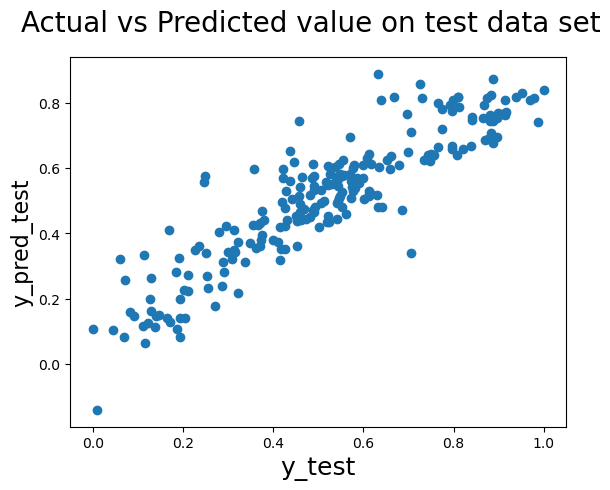

In [67]:
# Plotting y_test and y_pred_test to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('Actual vs Predicted value on test data set', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_test', fontsize=16)    

#### R-Squared value for test predictions

In [68]:
#Print R-squared Value
round (r2_score(y_test,y_pred_test),3)

0.805

#### `Inference`
R2 value for predictions on test data 0.805 is almost similar as R2 value of train data 0.823. This is a good R-squared value, hence we can see linear model is performing good even on unseen data (test data)

Text(0.5, 0, 'Errors')

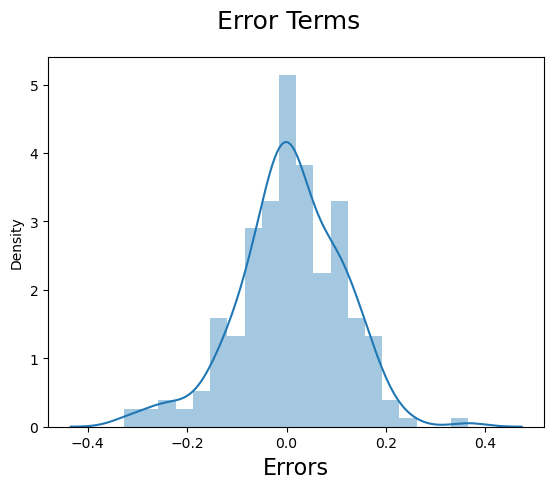

In [69]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred_test), bins = 20)
fig.suptitle('Error Terms', fontsize = 18)                  # Plot heading 
plt.xlabel('Errors', fontsize = 16)                         # X-label

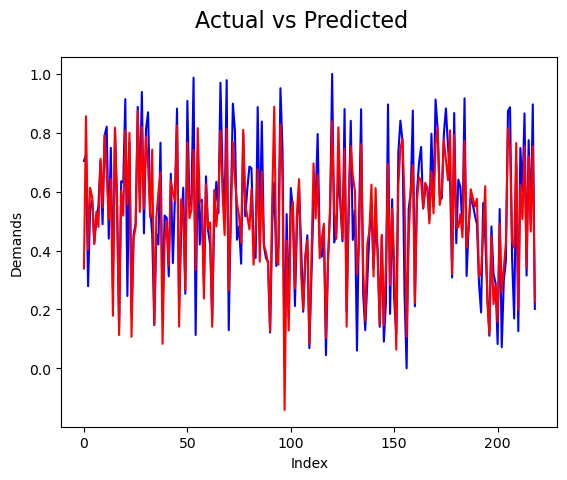

In [70]:
# Actual vs Predicted
c = [i for i in range(0,len(X_test_final),1)]
plt.plot(c,y_test,  color="blue")
plt.plot(c,y_pred_test, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 16)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

### Error Terms

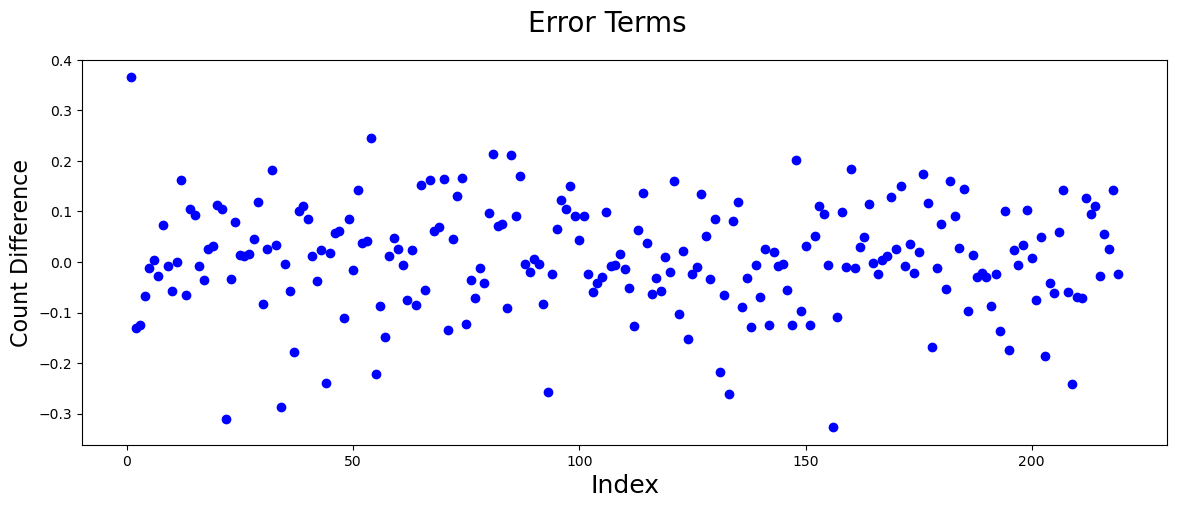

In [71]:
# Error terms
def err_terms(l1,l2):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,l1-l2, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Count Difference', fontsize=16)                # Y-label

err_terms(y_test,y_pred_test)

#### `Inference`
As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

In [72]:
round(lr_final.params,3)

const             0.194
july             -0.069
sep               0.066
Light_snowrain   -0.300
Misty            -0.080
spring           -0.111
winter            0.056
yr                0.233
holiday          -0.101
temp              0.471
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt = 0.194 - 0.069  \times  july + 0.066 \times sep - 0.300 \times Lightsnowrain - 0.080 \times Misty - 0.111 \times spring  + 0.056 \times winter + 0.233 \times yr - 0.101 \times holiday + 0.471 \times temp $

## Step 12: Conclusion

### Analysing the above model, the company should focus on the following features:
- Company should focus on expanding business during Spring.
- Company should focus on expanding business during july and september.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
- There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.


#### Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.


### Significant variables to predict the demand for shared bikes
- Year
- Temp
- Season (Spring, Winter)
- Months (July, September)
- Holiday
- Weathersit ( Light Snow or rain, Misty)

### ---------------  *** End of file *** ---------------